# Regression Analysis

># 1. Sample Data

### Boston House Prices dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


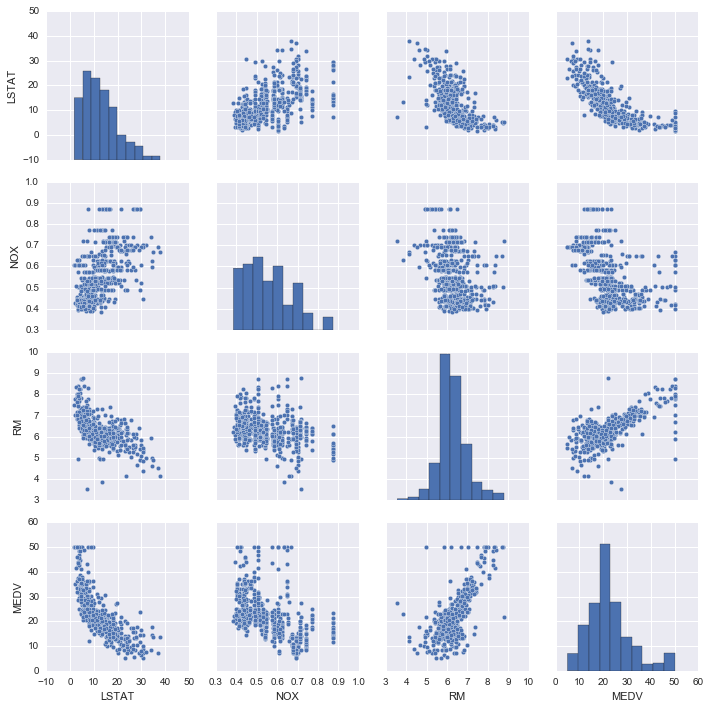

In [5]:
cols = ["LSTAT", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])
plt.show()

### Diabetes dataset

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns=["target"])],
               axis=1)
df.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


### Linnerrud dataset

In [3]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


># 2. make_regression

$$ y = b + w^T x + e $$ 
[more](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)

In [2]:
from sklearn.datasets import make_regression## MLE를 사용한 선형 회귀 분석
X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0, coef=True, random_state=0)

* Input 
>* `n_samples` : No. of samples / default=100
>* `n_features` : No. of features / default=100
>* `n_targets` : No. of target / default=1
>* `n_informative` : No. of features that actually have correlation with targets / default=10
>* `effective_rank`: No. of independent features / default=None (all features are independent)
>* `tail_strength` : Determines correlation between independent features (`effective_rank != None`) / default = 0.5
>* `bias` : bias / default=0.0
>* `noise` : Stdev of error added to the targets / default=0.0 
>* `coef` : if True, print the coefficents of the linear model / default=False
>* `random_state` : random seed / default=False

* Output
>* `X` : features in size of [`n_samples`, `n_features`]
>* `y` : targets in size of [`n_samples`] or [`n_samples`, `n_targets`]
>* `coef` : coefficients in size of [`n_features`] or [`n_features`, `n_targets`]

># 3. Linear Regression Analysis

### Definitions
* Regression Analysis: quantitative analysis on the relationship between the independent variables, $x$, and dependent variables $y$
  * Probabilistic Model 
  * Deterministic Model:

$$ \hat{y} = f \left( x \right) $$

* Since the model is dependent on previous data,

$$ \hat{y} = f \left( x; \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} \right) $$

* Linear Regression Analysis

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D $$

### Augmentation
* Adding constant to the independent variables

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a
$$

* StatsModels - `add_constant`
```python
import statsmodels.api as sm
X = sm.add_constant(X0)
```

### OLS (Ordinary Least Squares)
* Basic method of deterministic regression analysis
* Minimizes RSS (Residual Sum of Squares)
$$$$
$$ \hat{y} = Xw $$
$$$$
$$ e = {y} - \hat{y} = y - Xw $$
$$$$
$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$
$$$$
$$ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w $$
$$$$
$$ \dfrac{d \text{RSS}}{d w}  = 0 $$
$$$$
$$ X^TX w = X^T y $$
$$$$
$$  w = (X^TX)^{-1} X^T y $$
$$$$
* **Normal equation:**
$$$$
$$ X^T y - X^TX w = 0 $$
$$$$
$$ X^T (y - X w ) = X^T e = 0 $$
$$$$
$$ x_d^T e = 0 $$
$$$$
$$ x_d \perp e $$

### OLS - NumPy
* True Model:
$$ y = 100 + 80.7105 x + e $$
* Predicted Model:
$$ \hat{y} = 102.0270 + 81.5975 x $$

In [4]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [5]:
# Direct Calculation
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[ 102.02701439],
       [  81.59750943]])

In [7]:
# use lstsq method
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

### OLS - Scikit-Learn

1. `model = LinearRegression(fit_intercept=True)`
>* `fit_intercept=False` if there is no constant coefficient
>* The `LinearRegression` object has the following attributes
>  * `coef_`: predicted coefficient vector
>  * `intercept_`: predicted constant coefficient

2. `model = model.fit(X, y)` 
>* Returns itself
>* Augmentation not needed

3. `y_new = model.predict(x_new)`

In [11]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [12]:
model_boston.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [13]:
model_boston.intercept_

36.491103280359525

### OLS - StatsModels

1. `model = OLS(y, X)`
>* Augmentation needed / use `add_constant` method
2. `result = model.fit()`
>* Returns `RegressionResults` class object
>* This class has two methods - `summary` and `predict`
>* This class has two attributes - `resid` and `params`
3. `y_new = result.predict(x_new)`
>* x_new should be augmented

In [15]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 13 Oct 2017   Prob (F-statistic):          6.95e-135
Time:                        18:06:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

># 4. Probabilistic Linear Regression Analysis

### Bootstrapping
* Regression Analysis with re-sampled data
* Check the sample-dependency of the model
* Resampling with replacement: choose $N$ data from $N$ data

### Probabilistic Linear Regression Analysis
* **Assumption 1: Target data distribution**
* ($x$ and $y$ themselves do not have to be Normally distributed)
$$ y \sim \mathcal{N}(w^Tx, \sigma^2) $$
$$ \epsilon_i = y - w^Tx $$
$$$$
* **Assumption 1-1: Normal d.**
$$ p(y \mid x, \theta) = \mathcal{N}(y \mid w^Tx, \sigma^2 ) $$ <br>
$$ p(\epsilon \mid \theta) = \mathcal{N}(0, \sigma^2 ) $$ <br>
$$$$
* **Assumption 1-2: Exogeneity**
$$ \text{E}[\epsilon \mid x] = 0$$ <br>
$$$$
* **Assumption 1-3: Conditional Independence**
$$ \text{Cov}[\epsilon_i, \epsilon_j \mid x] =  0$$ 
$$$$
* **Assumption 2: Independent variables**
$$ \text{Covariance Matrix of the independent variables is full rank}$$
$$$$

### MLE - Maximum Likelihood Estimation
* **Likelihood:**
$$
\begin{eqnarray}
p(y_{1:N} \,\big|\, x_{1:N}, \theta)
&=& \prod_{i=1}^N N(y_i \,\big|\, w^T x_i , \sigma^2) \\
&=& \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
\end{eqnarray}
$$
$$$$
* **Log Likelihood:**
$$
\begin{eqnarray}
\text{LL}  
&=& \log p(y_{1:N} \,\big|\, x_{1:N}, \theta) \\
&=& \log \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
&=& -\dfrac{1}{2\sigma^2} \sum_{i=1}^N (y_i-w^T x_i)^2 - \dfrac{1}{2} \sum_{i=1}^N  \log{2\pi}{\sigma^2}  \\
\end{eqnarray}
$$
$$$$
* **LL(Matrix notation):**
$$ \text{LL}  =  -C_1 (y - Xw)^T(y-Xw) - C_0 = -C_1(w^TX^TXw -2 y^TXw + y^Ty) - C_0 $$
$$ C_1 =  -\dfrac{1}{2\sigma^2} $$
$$ C_0 =  \dfrac{1}{2} \sum_{i=1}^N  \log{2\pi}{\sigma^2} $$
$$$$
* **Optimization:**
$$ \dfrac{\partial}{\partial w} \text{LL} \propto - 2X^TX \hat{w} + 2X^Ty = 0 $$
$$ \hat{w} = (X^TX)^{-1}X^T y $$

### Residual: normal distribution
* Relationship between error($\epsilon$) and residual($e$)

$$  \hat{y} = X\hat{w} = X (X^TX)^{-1}X^T y = Hy $$

$$ e = y - \hat{y}= y - Hy = (I - H) y$$

* Define $M = I - H$,

$$ e = My = M (Xw + \epsilon) $$

* Use Normal Equation,

$$
X^TX \hat{w} - X^Ty = 0
$$

$$
X^T(X\hat{w} - y) = -X^Te = 0
$$

$$
X^TMy = 0 
$$

* Since this holds for any $y$,

$$
X^TM = 0
$$

* Since $H$ is symmetric, $M = I -H$is also symmetric

$$
MX = 0
$$


$$ e = MXw + M\epsilon = M\epsilon $$


$$ e =  M\epsilon $$

* The residual is a linear transformation of the error
* Thus, it is also normally distributed

### Normality Test

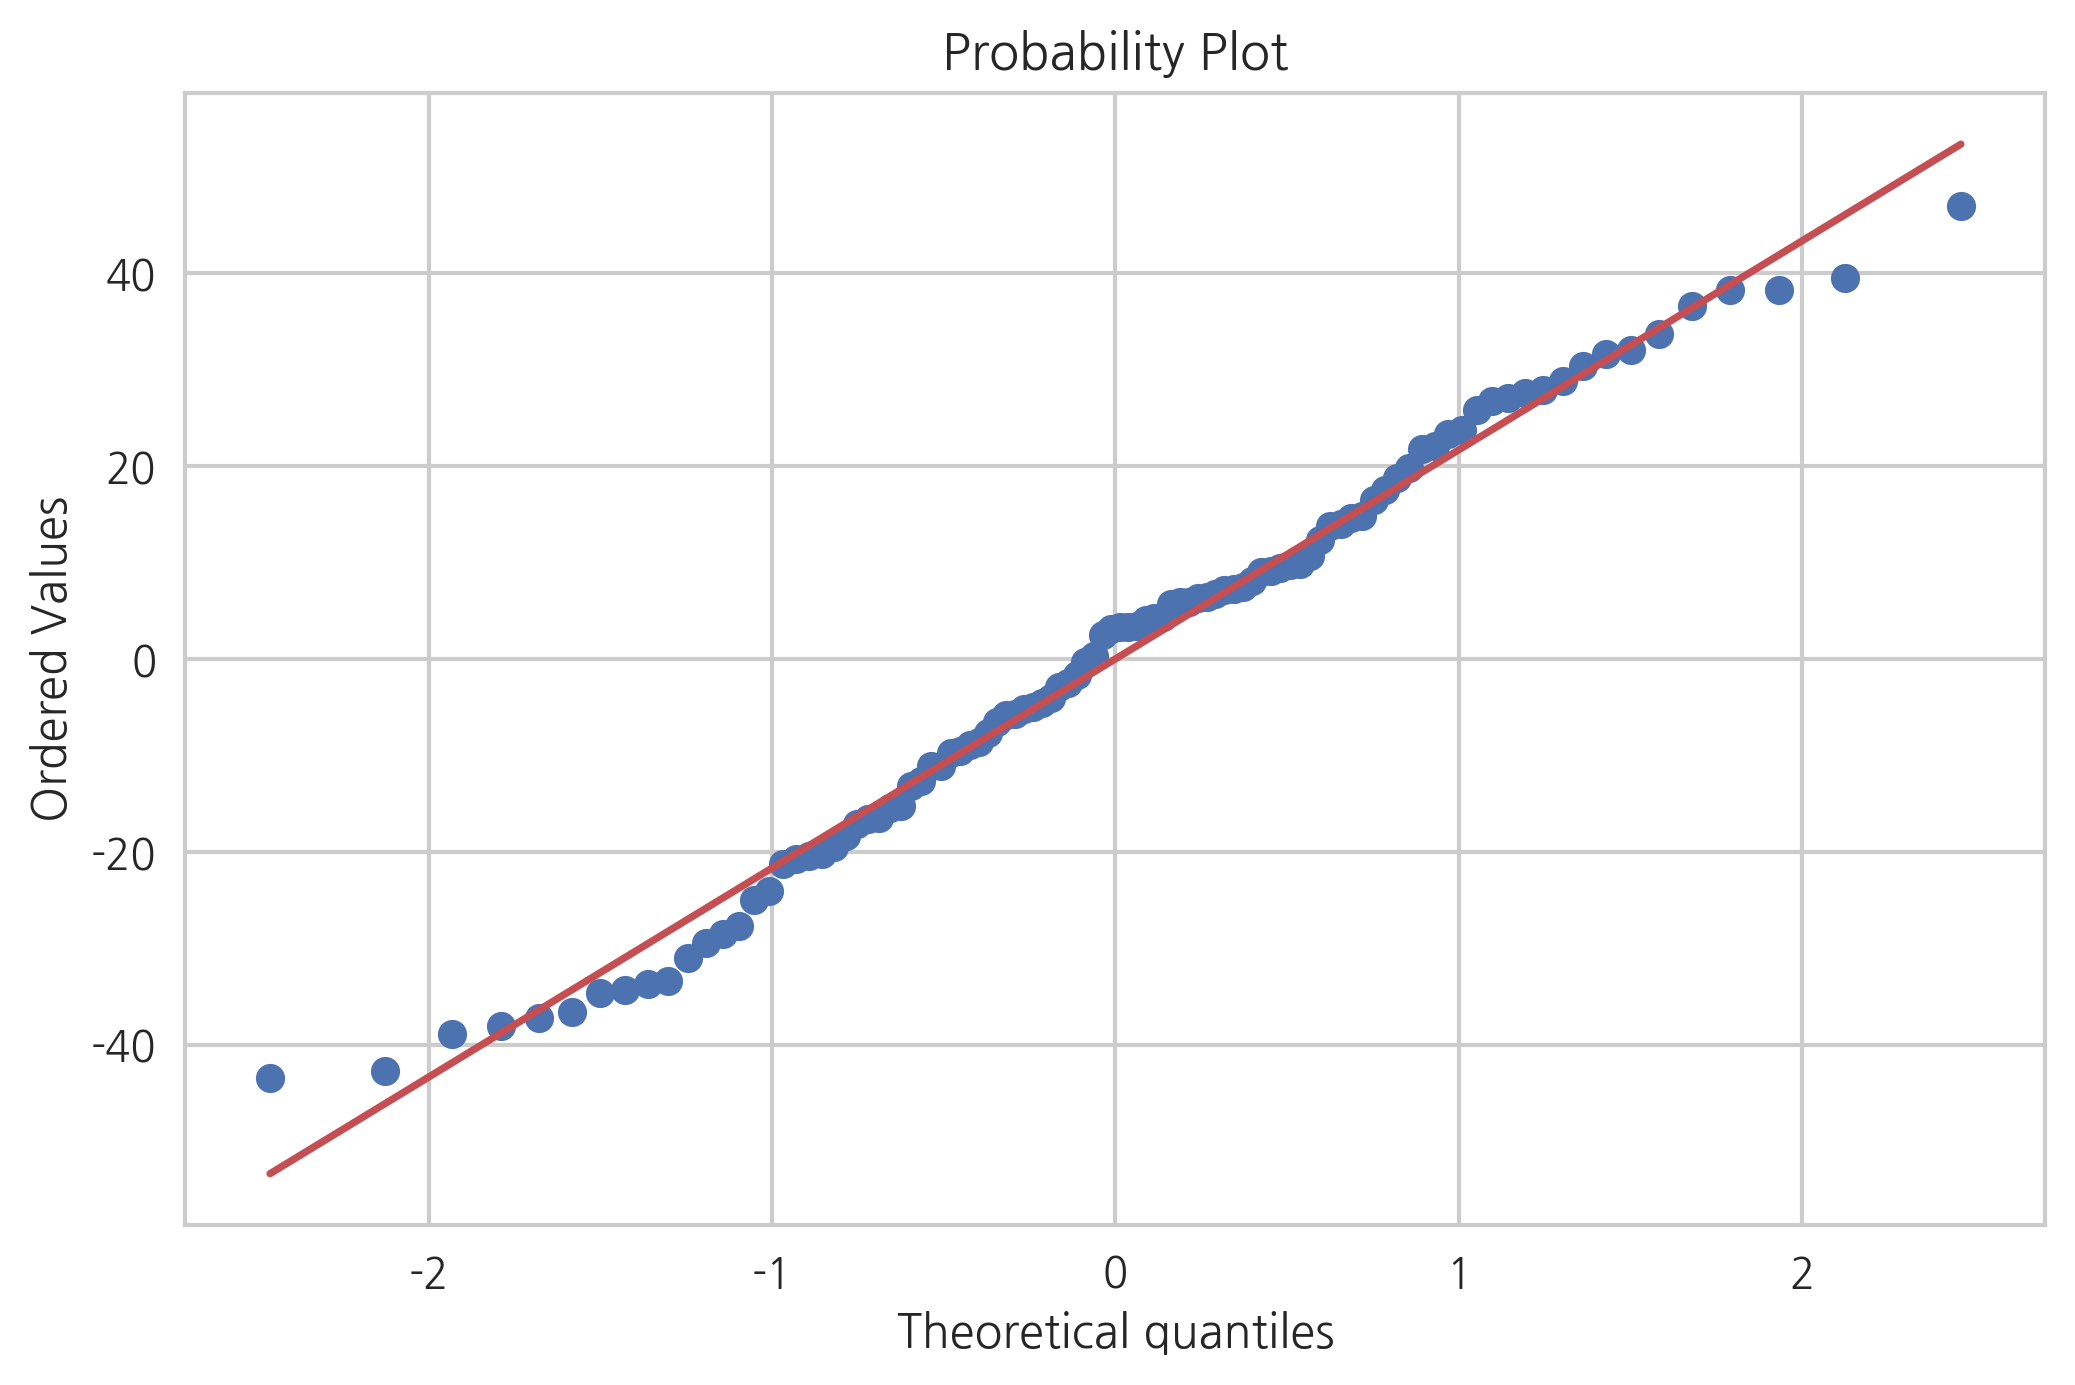

In [8]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [9]:
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.523
P-value     :  0.172


In [10]:
test = sms.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


### Residual dependence on independent variable

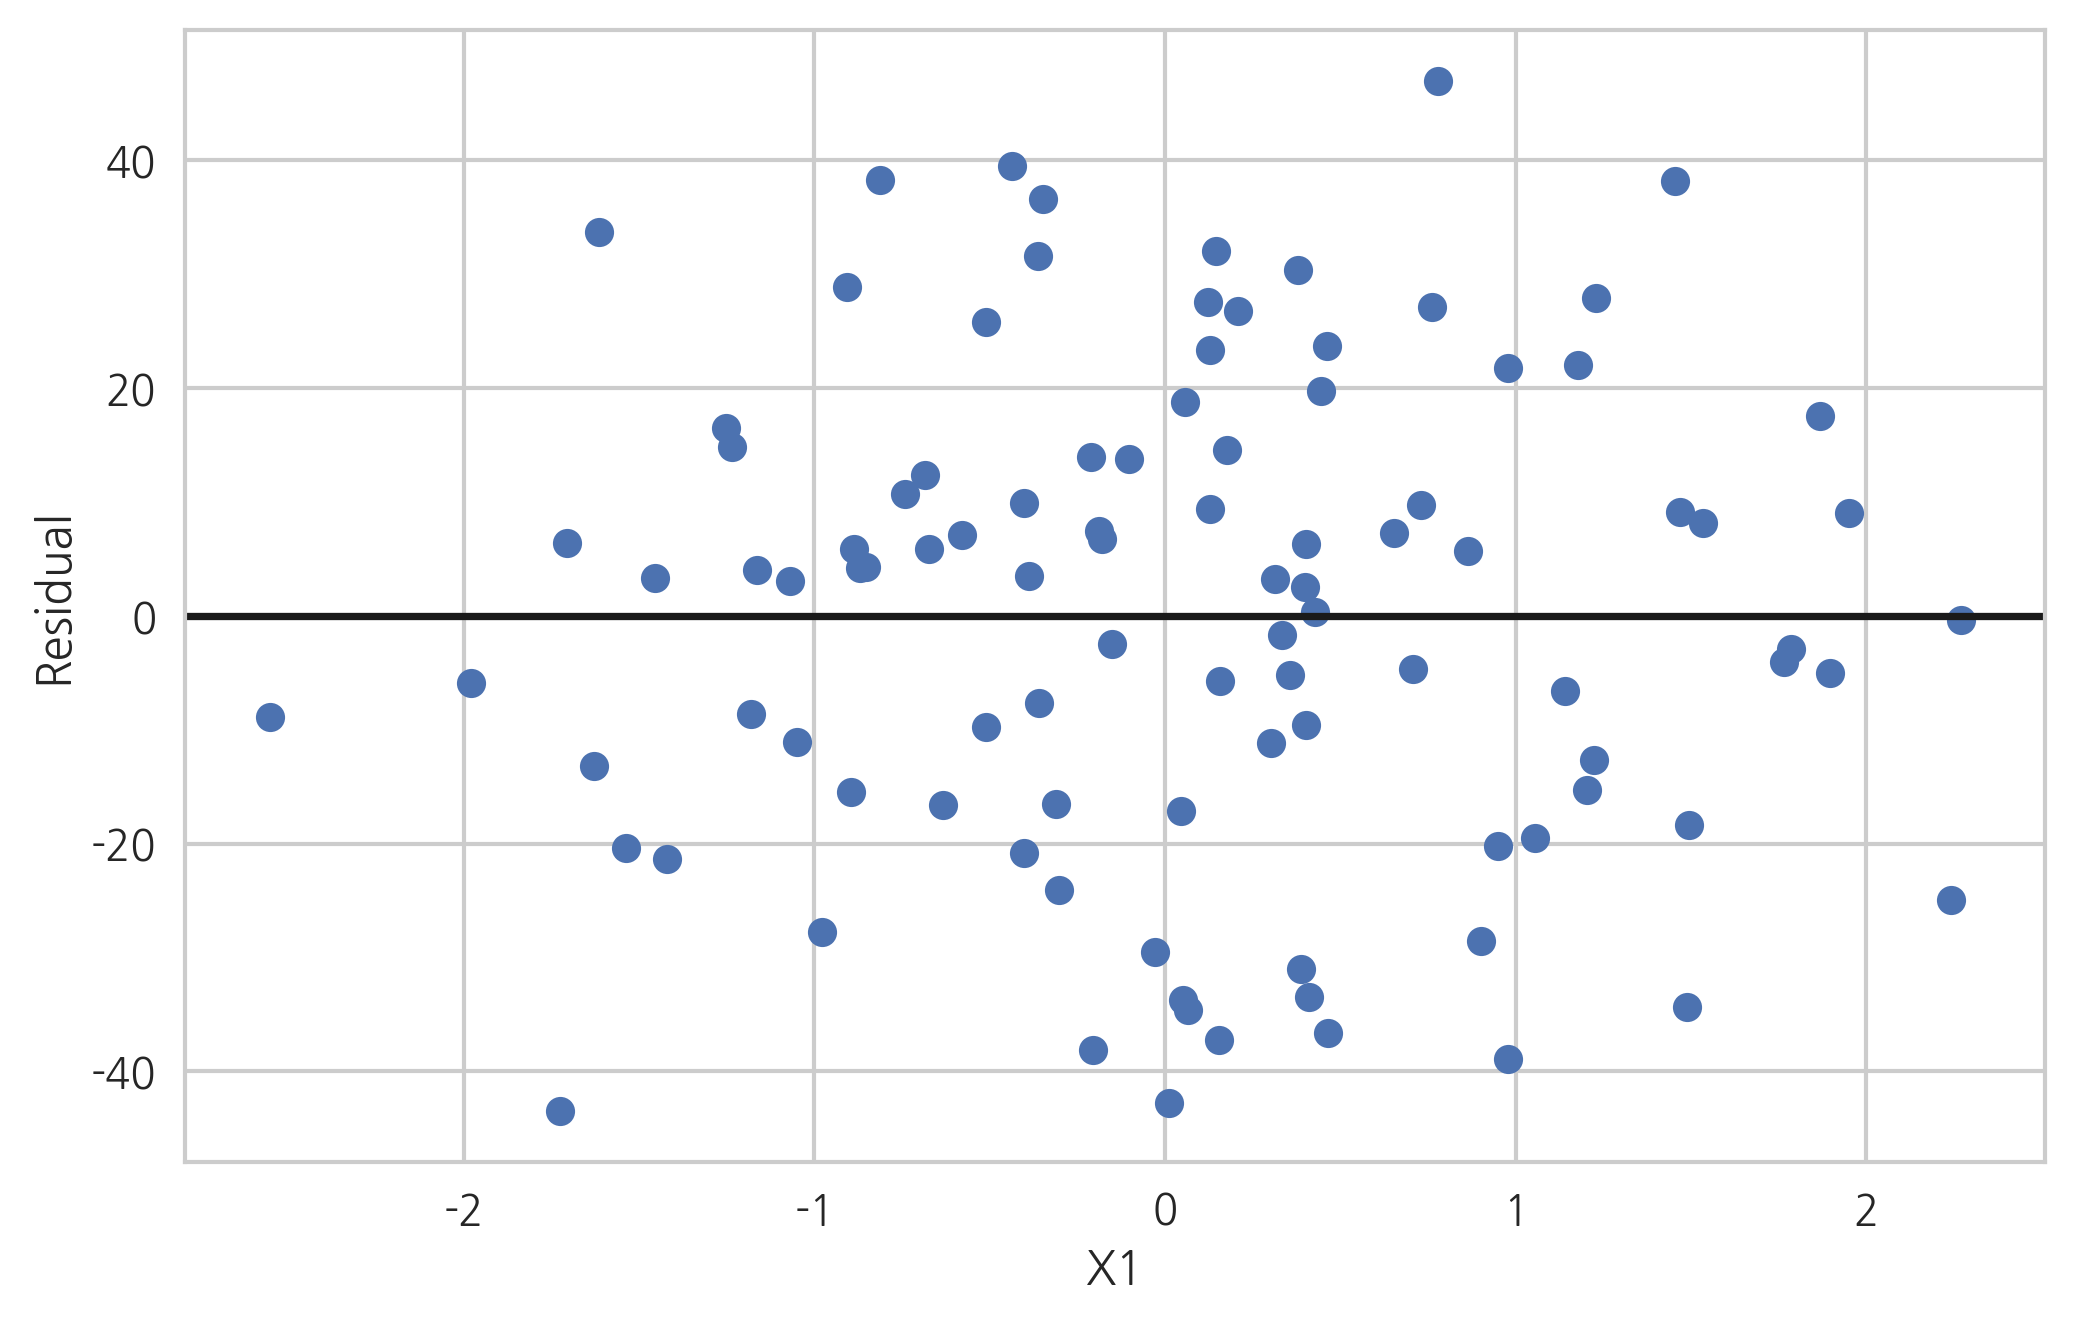

In [11]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

### Standard Error of Regression Coefficient
* $\hat{w}$ : normal distribution (since it is a linear transformation of $y$)
$$  
\begin{eqnarray}
\hat{w} 
&=& (X^TX)^{-1} X^T y \\
&=& (X^TX)^{-1} X^T (X w + \epsilon) \\
&=& w + (X^TX)^{-1} X^T \epsilon \\
\end{eqnarray}
$$

$$  
\begin{eqnarray}
\text{E}[\hat{w}] 
&=&  \text{E}[ w + (X^TX)^{-1} X^T \epsilon ] \\
&=&  w + (X^TX)^{-1} X^T \text{E}[ \epsilon ] \\
&=& w
\end{eqnarray}
$$

* Covariance of the coefficients:

$$
\begin{eqnarray}
\text{Cov}[\hat{w}] 
&=& E[(\hat{w} - w)(\hat{w} - w)^T] \\
&=& E[((X^TX)^{-1} X^T \epsilon)((X^TX)^{-1} X^T \epsilon)^T] \\
&=& E[(X^TX)^{-1} X^T \epsilon \epsilon^T X(X^TX)^{−1} ] \\
&=& (X^TX)^{-1} X^T E[\epsilon \epsilon^T] X(X^TX)^{−1} \\
&=& (X^TX)^{-1} X^T (\sigma^2 I) X(X^TX)^{−1} \\
&=& \sigma^2  (X^TX)^{-1}
\end{eqnarray}
$$

* Estimation of $\sigma^2$ ($N$: no. of data / $K$: no. of independent variables):

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$

* Hence,

$$ \text{Est.Cov}[\hat{w}]  = s^2(X^TX)^{-1}$$

$$\text{Est.Var}[\hat{w}_i]  = \left( \text{Est.Cov}[\hat{w}] \right)_{ii} $$

* **Standard Error of Regression Coefficient**:

 $$ {se_i} = \sqrt{s^2 \big((X^TX)^{-1}\big)_{ii}} $$

### Single Coefficient t-test

* Determines the significance of each independent variable

$$  \dfrac{\hat{w}_i - w_i}{se_i} \sim t_{N-K} $$

* Use this as test statistics & test for the following null hypothesis

$$ H_0 : \;\; w_i = 0 $$

* The `RegressionResults` class object has t_test() method

In [16]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


### F-statistics (Loss-of-Fit test)
* Null hypothesis:
$$ H_0 : w_1  = w_2 = \cdots = w_K = 0 $$
* Determines the significance of the entire model / the smaller the better